# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [42]:
import numpy as np

def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    i = 0
    x_next = x0
    while i < maxiter:
        x_n = x_next
        f_x_n = f(x_n)
        fder_x_n = fder(x_n)
        x_next = x_n - f_x_n/fder_x_n
        i += 1
        if np.linalg.norm(x_n - x_next) < eps:
            break
    return x_next, i

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [50]:
def func1(x): #simple quadratic equation
    return (4*x**2 - 5*x + 1) #two roots: x = 0.25, x = 1 

def func1der(x):
    return (8*x - 5)

root, it = newton_iteration(func1, func1der, 5.0)
print("Iteration №" + str(it) + ", root = " + str(root))

root, it = newton_iteration(func1, func1der, -5.0)
print("Iteration №" + str(it) + ", root = " + str(root))

Iteration №8, root = 1.0
Iteration №8, root = 0.24999999999999897


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [61]:
import numpy as np

def newton_iteration_m(f, fder, x0, m, eps=1e-5, maxiter=1000): #with a constant m 
    
    i = 0
    x_next = x0
    while i < maxiter:
        x_n = x_next
        f_x_n = f(x_n)
        fder_x_n = fder(x_n)
        x_next = x_n - m*(f_x_n/fder_x_n)
        i += 1
        if np.linalg.norm(x_n - x_next) < eps:
            break
    return x_next, i

In [75]:
func2 = lambda x: (x**2 -1)**2
der_func2 = lambda x: 4*x*(x**2 -1)
m = 2

root, it = newton_iteration_m(func2, der_func2, 5, m)
print("Iteration №" + str(it) + ", m = " + str(m) + ", root = " + str(root))

m = 1
root, it = newton_iteration_m(func2, der_func2, 5, m)
print("Iteration №" + str(it) + ", m = " + str(m) + ", root = " + str(root))

m = 3
root, it = newton_iteration_m(func2, der_func2, 5, m)
print("Iteration №" + str(it) + ", m = " + str(m) + ", root = " + str(root))

Iteration №6, m = 2, root = 1.0000000000107445
Iteration №22, m = 1, root = 1.0000057377057807
Iteration №18, m = 3, root = 0.9999980599836018


In [95]:

m = 2
root, it = newton_iteration_m(func2, der_func2, 2.5, m, maxiter = 5)

m = 3
root2, it2 = newton_iteration_m(func2, der_func2, 2.5, m)

print("With starting point x0 = 2.5 and m = 3 after 5 iterations we get x = " + str(root2))
print("With starting point x0 = 2.5 and m = 2 after 5 iterations we get x = " + str(root))

With starting point x0 = 2.5 and m = 3 after 5 iterations we get x = 1.0000024593948984
With starting point x0 = 2.5 and m = 2 after 5 iterations we get x = 1.0000000000033555


 My observations are consistent with the expectation mentioned above.

# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

(0.0, 1.5, 0.0, 1.5)

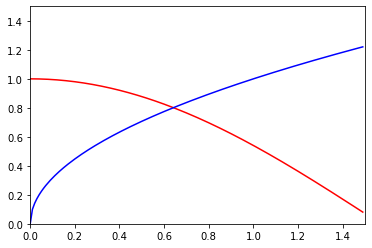

In [106]:
import matplotlib.pyplot as plt
import math

t = np.arange(0.0, 1.5, 0.01)
cost = np.cos(t)
sqrtt = np.sqrt(t)
plt.plot(t, cost, 'r-', t, sqrtt, 'b-')
plt.axis([0,1.5, 0,1.5])


Inspecting the plot i can say that the root is somewhere near 0.6, probably 0.62 or something

We search for a root of $$ f(x) = \sqrt{x} - \cos{x}  $$ Rewrite the equation as: $$ x = x - \sqrt{x} + \cos{x}  $$

In [148]:
def fixed_point(f, x0, eps = 1e-5, maxiter = 1000):
    x_next = x0
    i = 0
    while i < maxiter: 
        x_n = x_next
        x_next = f(x_n)
        i+=1
        if np.linalg.norm(x_n - x_next) < eps:
            break
    return i, x_next

In [150]:
import math


func3 = lambda x: x - math.sqrt(x) + math.cos(x) #define phi at once (not f)

it, root = fixed_point(func3, 1.57) #~pi/2 is a good starting point because abs(pi/2(pi/2 - sqrt(pi/2) + cos(pi/2)) < 1
print("Iteration №" + str(it) + ", root = " + str(root))

Iteration №9, root = 0.6417126152285205


In [198]:
def fixed_point_2(f, x0, a, eps = 1e-5, maxiter = 1000):
    x_next = x0
    i = 0
    while i < maxiter:
        x_n = x_next
        x_next = x_n - a*f(x_n)
        i += 1 
        if np.linalg.norm(x_n - x_next) < eps:
            break
    return i, x_next

In [217]:
func4 = lambda x: math.sqrt(x) - math.cos(x)

it, root = fixed_point_2(func4, 1.57, 0.5) 

print("Iteration №" + str(it) + ", root = " + str(root))

Iteration №13, root = 0.6417175990407822


The derivative of $$f(x) = \sqrt{x} - \cos{x} $$ is $$\frac{1}{2\sqrt{x}} + \sin{x} $$ 
It has no global maximums or minimums but we'll take a local maximum at ~1.42 and a local minimum at ~0.42

Then $$ \alpha = \frac{2}{m + M} = 1,08... $$

In [218]:
it, root = fixed_point_2(func4, 1.57, 1.08) 

print("Iteration №" + str(it) + ", root = " + str(root))

Iteration №12, root = 0.6417158972596525


For different alphas: 

In [223]:
alphas = np.arange(0.5, 1.2, 0.1)
for alpha in alphas:
    it, root = fixed_point_2(func4, 1.57, alpha) 
    print("Iteration №" + str(it) + ", root = " + str(root) + "alpha = " + str(alpha))

Iteration №13, root = 0.6417175990407822alpha = 0.5
Iteration №10, root = 0.641715461557739alpha = 0.6
Iteration №7, root = 0.6417148122606119alpha = 0.7
Iteration №5, root = 0.6417143472291544alpha = 0.7999999999999999
Iteration №7, root = 0.6417142103484347alpha = 0.8999999999999999
Iteration №9, root = 0.6417126152285205alpha = 0.9999999999999999
Iteration №13, root = 0.6417130829141894alpha = 1.0999999999999999


The method behaves somewhat well around the point 1.08 but it behaves better with many other alphas. We can't know for sure since we can't know supremums or infimums of the derivative of f(x)

# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.

Sounds interesting but I don't have time for it